## Final Project-3 Submission

Please fill out:
* Student name: Hawkins Murithi Kobia 
* Student pace: full time
* Scheduled project review date/time: June 7th
* Instructor name: Maryann Mwikali

## DATA UNDERSTANDING

**Import the necessary libraries**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
#Import Numpy and the Pandas Package
import numpy as np
import pandas as pd
#Import OneHotEncoder libraries
from sklearn.preprocessing import OneHotEncoder
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Import Train/Test libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

**Reading the dataset**

In [2]:
df = pd.read_csv("vehicle_maintenance_data.csv")
df.head(20)

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1
5,Truck,31653,Average,2,1,Diesel,Automatic,800,70954,2023-08-12,2024-09-05,Third,16813,5,3,15.954422,Worn Out,Good,New,0
6,Motorcycle,51211,Average,2,8,Diesel,Automatic,2500,145563,2024-01-13,2025-07-20,Second,21057,10,0,16.455703,New,Good,New,0
7,Van,79093,Poor,2,2,Petrol,Automatic,2000,132354,2023-05-12,2026-02-13,First,6498,3,1,12.128404,Good,New,New,1
8,SUV,59673,Good,2,6,Electric,Manual,800,85733,2023-04-07,2025-04-21,First,12787,9,1,11.558027,Worn Out,Good,Weak,1
9,Bus,37001,Good,2,9,Diesel,Automatic,1500,8554,2023-08-05,2025-05-14,Third,20860,9,1,12.787248,Worn Out,New,New,0


In [3]:
df.columns

Index(['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues',
       'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
       'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Tire_Condition',
       'Brake_Condition', 'Battery_Status', 'Need_Maintenance'],
      dtype='object')

**Columns Overview**


**- Vehicle_Model:** Type of vehicle (e.g., Truck, Van, Bus).

**- Mileage:** Distance the vehicle has traveled.


**- Maintenance_History:** Maintenance status (e.g., Good, Average, Poor).


**- Reported_Issues:** Number of issues reported.


**- Vehicle_Age:** Age of the vehicle in years.


**- Fuel_Type:** Type of fuel used (e.g., Electric, Petrol, Diesel).

**- Transmission_Type:** Type of transmission (e.g., Automatic, Manual).


**- Engine_Size:** Engine size in cc.


**- Odometer_Reading:** Total distance recorded by the vehicle's odometer.


**- Last_Service_Date:** Date of the last service.


**- Warranty_Expiry_Date:** Date when the warranty expires.


**- Owner_Type:** Ownership status (e.g., First, Second, Third).


**- Insurance_Premium:** Cost of the insurance premium.


**- Service_History:** Number of services conducted. 


**- Accident_History:** Number of accidents reported. 


**- Fuel_Efficiency:** Fuel efficiency in km per liter.


**- Tire_Condition:** Condition of the tires (e.g., New, Worn Out).


**- Brake_Condition:** Condition of the brakes (e.g., New, Good, Worn Out).


**- Battery_Status:** Condition of the battery (e.g., New, Weak).


**- Need_Maintenance:** Indicator of whether the vehicle needs maintenance (1: Yes, 0: No).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

- The DataFrame contains 50,000 rows and 20 columns.


- All columns have 50,000 non-null entries, indicating no missing values.


- **Column Data Types**:

  - **object (10 columns)**: Text data (e.g., `Vehicle_Model`, `Maintenance_History`).
  - **int64 (9 columns)**: Integer data (e.g., `Mileage`, `Vehicle_Age`).
  - **float64 (1 column)**: Floating-point data (`Fuel_Efficiency`).
  
- **Memory Usage**: The DataFrame uses approximately 7.6 megabytes of memory.



In [5]:
df.shape

(50000, 20)

## DATA CLEANING

**Checking for null-values**

In [6]:
null_values = df.isnull().sum()
print(null_values)

Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64


**Converting the "Last_Service_Date" ,'Warranty_Expiry_Date' to datetime**

In [7]:
# Convert '	Last_Service_Date' to datetime
df['Last_Service_Date'] = pd.to_datetime(df['Last_Service_Date'], errors='coerce')

In [8]:
# Convert 'Warranty_Expiry_Date' to datetime
df['Warranty_Expiry_Date'] = pd.to_datetime(df['Warranty_Expiry_Date'], errors='coerce')

**Check for duplicates based on all columns**

In [9]:
# Check for duplicates based on all columns
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [10]:
# Remove duplicates
df = df.drop_duplicates()

In [11]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Vehicle_Model         50000 non-null  object        
 1   Mileage               50000 non-null  int64         
 2   Maintenance_History   50000 non-null  object        
 3   Reported_Issues       50000 non-null  int64         
 4   Vehicle_Age           50000 non-null  int64         
 5   Fuel_Type             50000 non-null  object        
 6   Transmission_Type     50000 non-null  object        
 7   Engine_Size           50000 non-null  int64         
 8   Odometer_Reading      50000 non-null  int64         
 9   Last_Service_Date     50000 non-null  datetime64[ns]
 10  Warranty_Expiry_Date  50000 non-null  datetime64[ns]
 11  Owner_Type            50000 non-null  object        
 12  Insurance_Premium     50000 non-null  int64         
 13  Service_History 


- **No Missing Values**: All columns have complete data with 50,000 non-null entries each.
- **No Duplicates**: There are no duplicate rows, ensuring each record in the dataset is unique.
- **Data Types**: All columns have appropriate data types, with date columns correctly converted to `datetime` format.

The dataset is clean and does not require any further cleaning. 

## DESCRIPTIVE STATISTICS

In [12]:
df.describe()

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,54931.232680,2.497420,5.492260,1556.292000,75551.187060,2023-09-13 10:33:48.096000,2025-04-11 15:56:30.336000256,17465.340700,5.515560,1.50156,14.990323,0.809960
min,30001.000000,0.000000,1.000000,800.000000,1001.000000,2023-03-30 00:00:00,2024-04-28 00:00:00,5000.000000,1.000000,0.00000,10.000098,0.000000
25%,42471.500000,1.000000,3.000000,1000.000000,38009.000000,2023-06-21 00:00:00,2024-10-18 00:00:00,11189.750000,3.000000,0.00000,12.489037,1.000000
50%,54810.000000,2.000000,5.000000,1500.000000,75598.500000,2023-09-14 00:00:00,2025-04-12 00:00:00,17477.500000,6.000000,2.00000,14.986352,1.000000
75%,67391.500000,4.000000,8.000000,2000.000000,112999.500000,2023-12-06 00:00:00,2025-10-04 00:00:00,23692.000000,8.000000,3.00000,17.474676,1.000000
max,80000.000000,5.000000,10.000000,2500.000000,149999.000000,2024-02-28 00:00:00,2026-03-29 00:00:00,30000.000000,10.000000,3.00000,19.999968,1.000000
std,14401.912925,1.708781,2.875682,627.677218,43088.105658,NaN,NaN,7223.393401,2.874899,1.11951,2.885583,0.392336


## EXPLORATORY DATA ANALYSIS (EDA)

### Checking for class imbalance using the 'Need Maintainance' Column

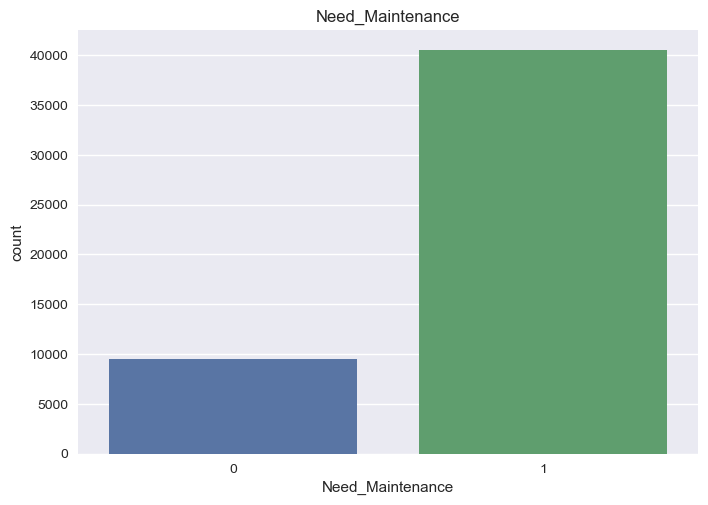

In [13]:
sns.countplot(data=df, x='Need_Maintenance')
plt.title('Need_Maintenance')
plt.show()

**Need_Maintenance = 1 is taller than the bar for Need_Maintenance = 0.**

A larger proportion of vehicles in the dataset require maintenance compared to those that do not. This indicates potential issues with vehicle reliability or the need for better maintenance schedules.

## Checking for Outliers

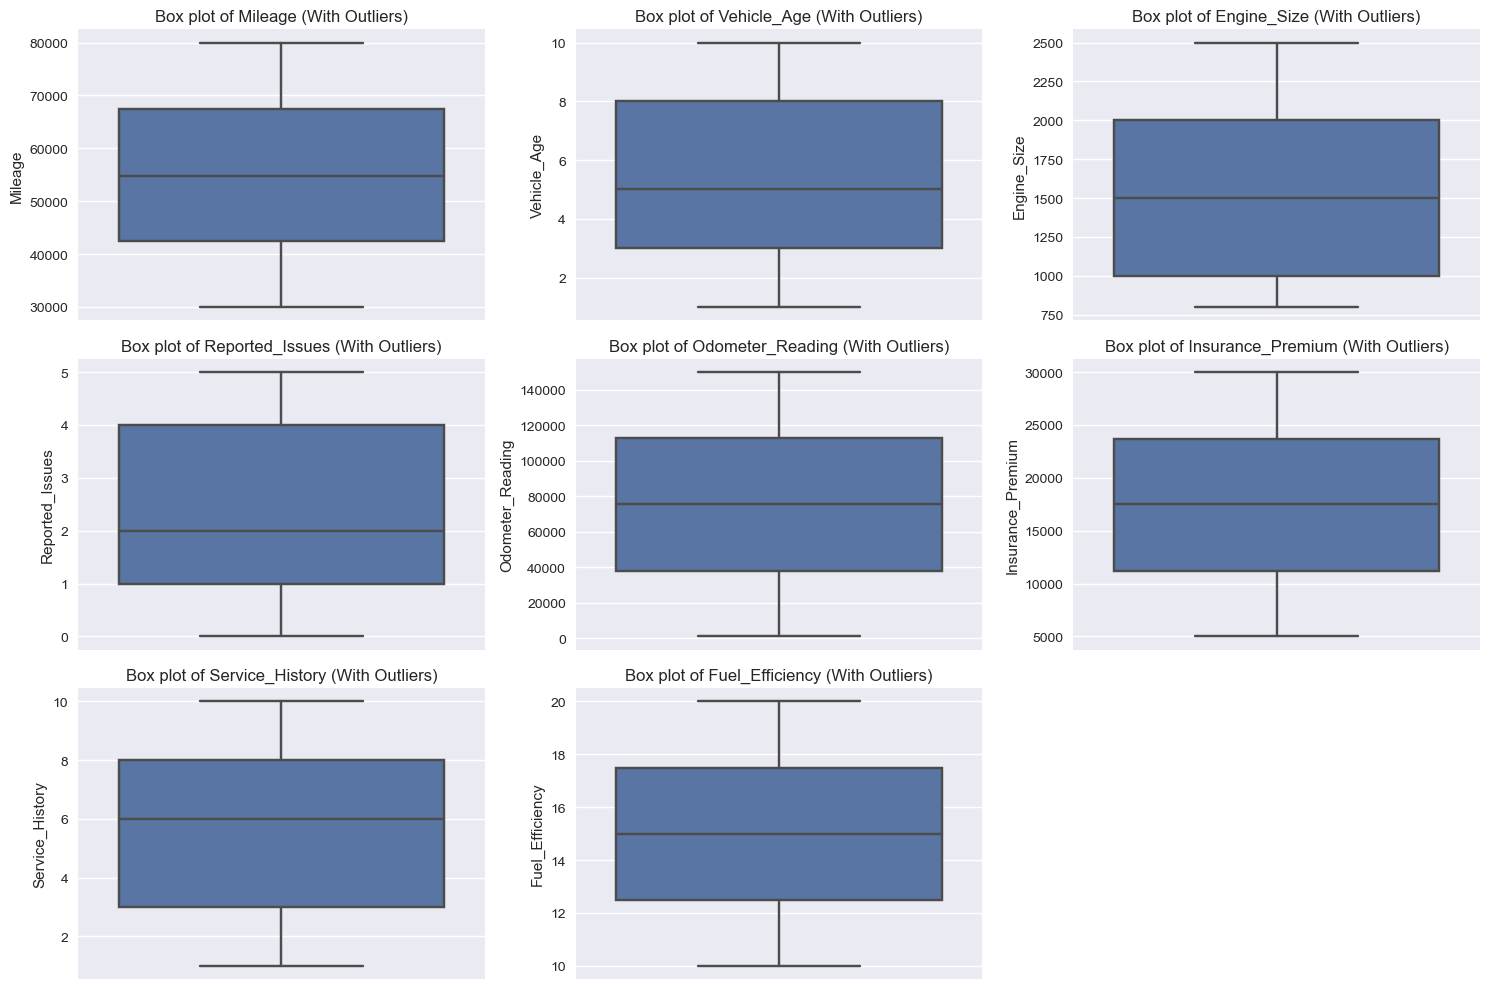

In [14]:
def plot_boxplots_with_outliers(data, numerical_columns):
    """
    Plots box plots for numerical columns with outliers.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    numerical_columns (list): A list of numerical column names.

    Returns:
    None
    """
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(data=data, y=col, palette="deep")
        plt.title(f'Box plot of {col} (With Outliers)')
    plt.tight_layout()
    plt.show()

numerical_columns = ['Mileage', 'Vehicle_Age', 'Engine_Size','Reported_Issues', 'Odometer_Reading', 'Insurance_Premium', 'Service_History', 'Fuel_Efficiency']
plot_boxplots_with_outliers(df, numerical_columns)



After running the plot_boxplots_with_outliers function,I observed that there are no outliers in the box plots for each numerical column, which concludes the following:

**Clean Data:** The numerical columns in my dataset do not contain significant outliers, indicating that the data is well-behaved and clean.


**No Further Outlier Handling Needed:** Since there are no outliers, there's no need to apply outlier handling techniques such as trimming or winsorizing.

### Pair Plot

To explore the relationships between pairs of numerical features and attrition.

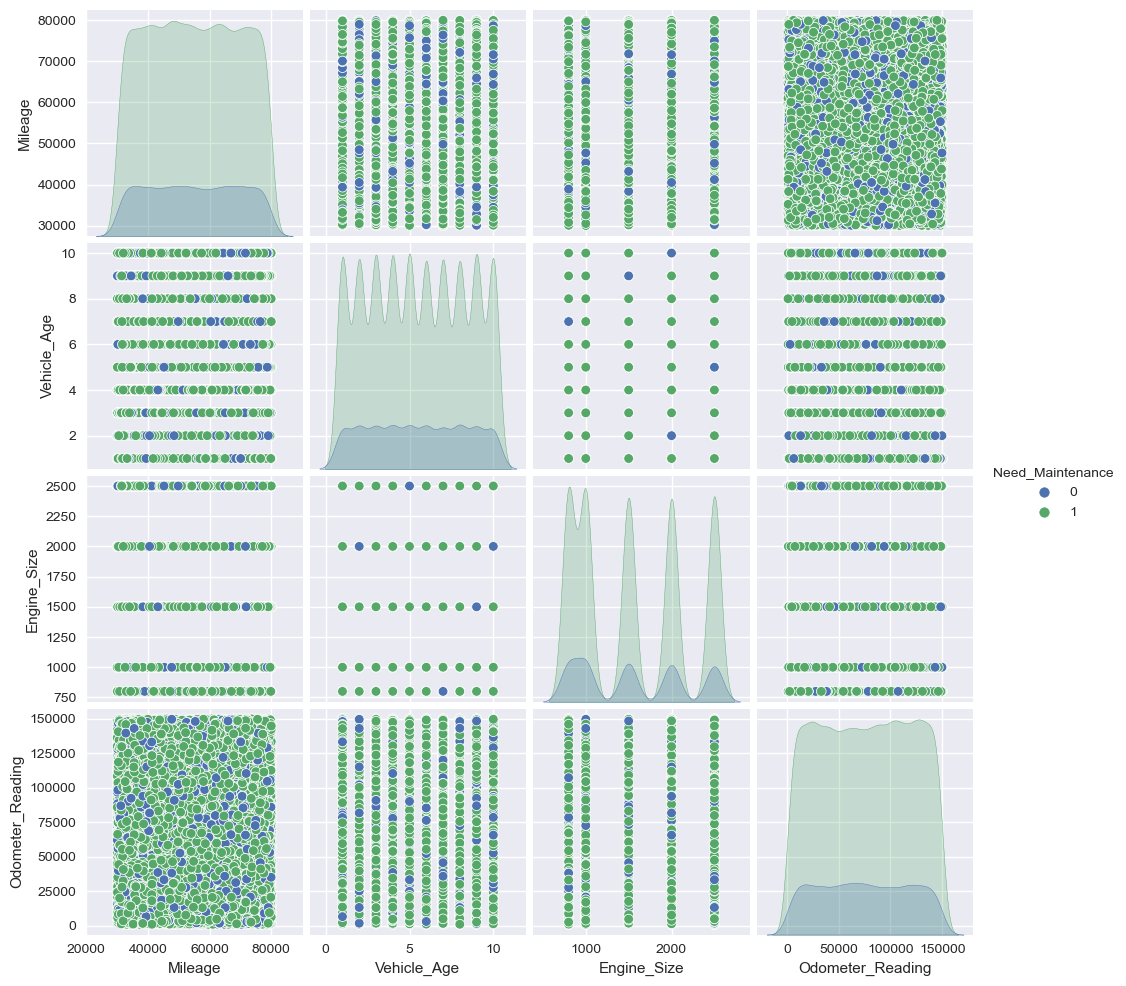

In [15]:
sns.pairplot(df, hue='Need_Maintenance', vars=['Mileage', 'Vehicle_Age', 'Engine_Size','Odometer_Reading'])
plt.show()

### Bar Plot

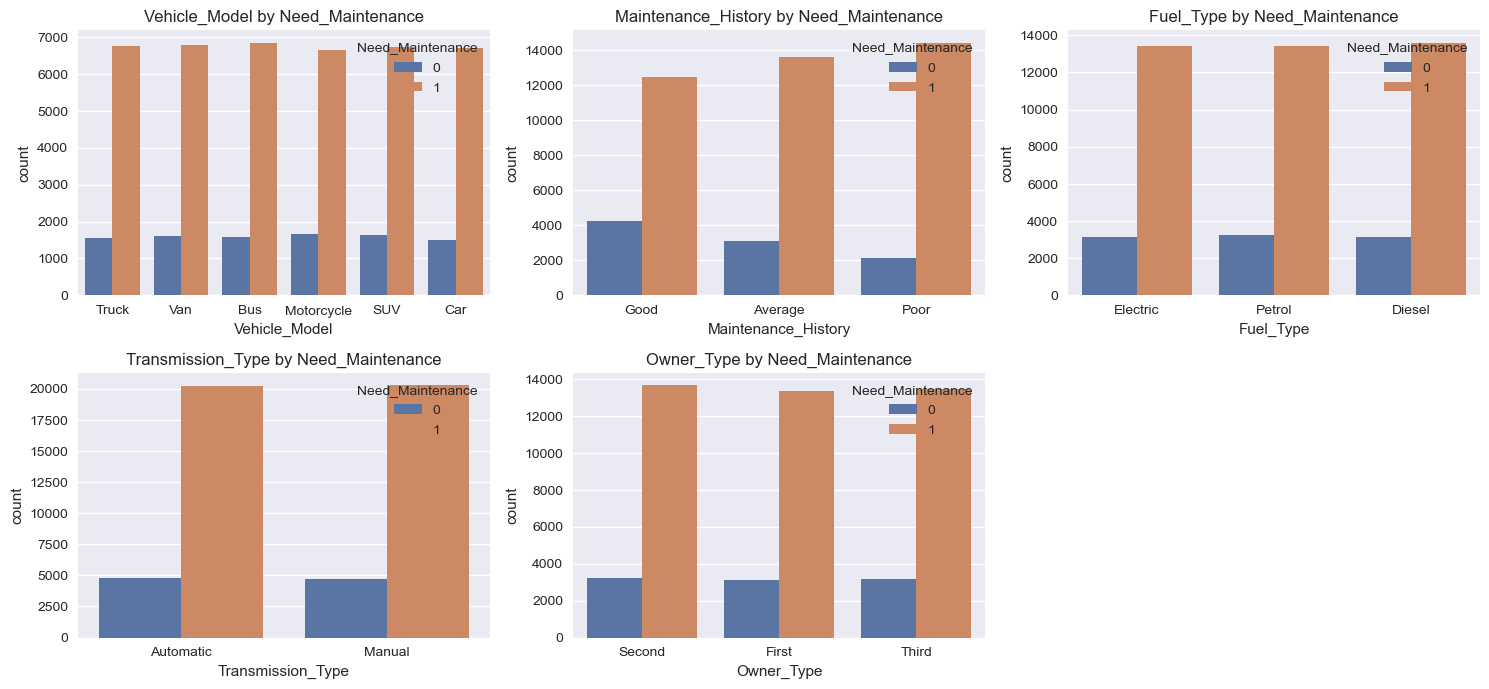

In [16]:
def plot_countplots_with_Need_Maintenance(df, categorical_columns):
    """
    Plot count plots for categorical features with respect to Need_Maintenance.

    Args:
    - df: DataFrame containing the data
    - categorical_columns: List of categorical column names

    Returns:
    - None
    """
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(3, 3, i)
        sns.countplot(x=col, hue='Need_Maintenance', data=df, palette="deep")
        plt.title(f'{col} by Need_Maintenance')
    plt.tight_layout()
    plt.show()

# List of categorical features to plot
categorical_columns = ['Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type', 'Owner_Type']

# Call the function to plot count plots with attrition
plot_countplots_with_Need_Maintenance(df, categorical_columns)

The above helps to see how categorical features like'Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type', 'Owner_Type' vary across the target variable.

## MODELLING

### One-Hot Encoding

In [30]:
# Define categorical columns
categorical_columns = ['Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type', 'Owner_Type','Tire_Condition' , 'Brake_Condition', 'Battery_Status' ]
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Convert boolean columns to binary (0/1)
boolean_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)
# Check the encoded dataframe
df_encoded.head()

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Insurance_Premium,Service_History,Accident_History,...,Fuel_Type_Petrol,Transmission_Type_Manual,Owner_Type_Second,Owner_Type_Third,Tire_Condition_New,Tire_Condition_Worn Out,Brake_Condition_New,Brake_Condition_Worn Out,Battery_Status_New,Battery_Status_Weak
0,58765,0,4,2000,28524,2023-11-23,2025-06-24,20782,6,3,...,0,0,1,0,1,0,1,0,0,1
1,60353,1,7,2500,133630,2023-09-21,2025-06-04,23489,7,0,...,0,0,1,0,1,0,1,0,0,1
2,68072,0,2,1500,34022,2023-06-27,2025-04-27,17979,7,0,...,0,0,0,0,1,0,0,0,0,1
3,60849,4,5,2500,81636,2023-08-24,2025-11-05,6220,7,3,...,1,0,1,0,1,0,0,1,1,0
4,45742,5,1,2000,97162,2023-05-25,2025-09-14,16446,6,2,...,1,1,0,1,0,0,0,0,0,1


In [31]:
# Check the data types of columns in df_encoded
print(df_encoded.dtypes)


Mileage                              int64
Reported_Issues                      int64
Vehicle_Age                          int64
Engine_Size                          int64
Odometer_Reading                     int64
Last_Service_Date           datetime64[ns]
Warranty_Expiry_Date        datetime64[ns]
Insurance_Premium                    int64
Service_History                      int64
Accident_History                     int64
Fuel_Efficiency                    float64
Need_Maintenance                     int64
Vehicle_Model_Car                    int32
Vehicle_Model_Motorcycle             int32
Vehicle_Model_SUV                    int32
Vehicle_Model_Truck                  int32
Vehicle_Model_Van                    int32
Maintenance_History_Good             int32
Maintenance_History_Poor             int32
Fuel_Type_Electric                   int32
Fuel_Type_Petrol                     int32
Transmission_Type_Manual             int32
Owner_Type_Second                    int32
Owner_Type_

### Train_test_split

In [32]:
# Define features and target
X = df_encoded.drop(columns = ['Need_Maintenance','Last_Service_Date','Warranty_Expiry_Date'])
y = df_encoded['Need_Maintenance']
    
 # Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### Train the logistic regression classifier

In [46]:
# Initialize the logistic regression classifier
log_reg = LogisticRegression(random_state=42)

In [47]:
# Train the logistic regression classifier
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Evaluate the Model

In [48]:
# Predictions on the testing set
log_reg_y_pred = log_reg.predict(X_test)


In [49]:
# Model evaluation
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)


Logistic Regression Accuracy: 0.8101333333333334


In [39]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, log_reg_y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2855
           1       1.00      1.00      1.00     12145

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [50]:
# Feature importance
feature_importance = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                     Feature  Importance
26       Battery_Status_Weak    0.299417
24  Brake_Condition_Worn Out    0.223907
1            Reported_Issues    0.191724
7           Accident_History    0.099770
15  Maintenance_History_Poor    0.077682
6            Service_History    0.072672
14  Maintenance_History_Good    0.034828
16        Fuel_Type_Electric    0.000000
25        Battery_Status_New    0.000000
23       Brake_Condition_New    0.000000
22   Tire_Condition_Worn Out    0.000000
21        Tire_Condition_New    0.000000
20          Owner_Type_Third    0.000000
19         Owner_Type_Second    0.000000
18  Transmission_Type_Manual    0.000000
17          Fuel_Type_Petrol    0.000000
0                    Mileage    0.000000
12       Vehicle_Model_Truck    0.000000
11         Vehicle_Model_SUV    0.000000
10  Vehicle_Model_Motorcycle    0.000000
9          Vehicle_Model_Car    0.000000
8            Fuel_Efficiency    0.000000
5          Insurance_Premium    0.00